In [39]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/500-person-gender-height-weight-bodymassindex/500_Person_Gender_Height_Weight_Index.csv


In [28]:
inpt = pd.read_csv('/kaggle/input/500-person-gender-height-weight-bodymassindex/500_Person_Gender_Height_Weight_Index.csv')
inpt.head()

,Gender,Height,Weight,Index
0,Male,174,96,4
1,Male,189,87,2
2,Female,185,110,4
3,Female,195,104,3
4,Male,149,61,3


In [40]:
from sklearn.linear_model import LogisticRegression, Perceptron, SGDClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import  DecisionTreeClassifier
from sklearn.model_selection import train_test_split

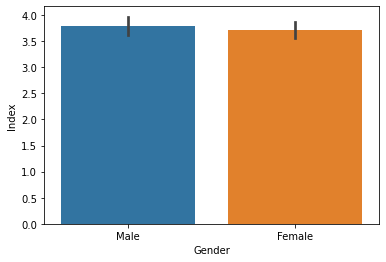

In [30]:
sns.barplot(x='Gender', y='Index', data=inpt)

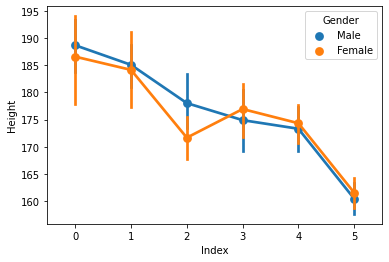

In [31]:
sns.pointplot(x='Index', y='Height', hue='Gender', data=inpt)

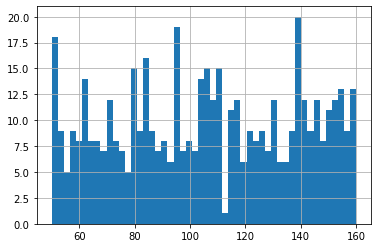

In [32]:
inpt['Weight'].hist(bins=50)

In [33]:
def indexGroup(Index):
    if Index == 0:
        return 'Extremely Weak'
    elif Index == 1:
        return 'Weak'
    elif Index == 2:
        return 'Normal'
    elif Index == 3:
        return 'Overweight'
    elif Index == 4:
        return 'Obesity'
    elif Index == 5:
        return 'Extreme Obesity'

inpt['Index_Group'] = inpt['Index'].apply(indexGroup)
inpt.head()

,Gender,Height,Weight,Index,Index_Group
0,Male,174,96,4,Obesity
1,Male,189,87,2,Normal
2,Female,185,110,4,Obesity
3,Female,195,104,3,Overweight
4,Male,149,61,3,Overweight


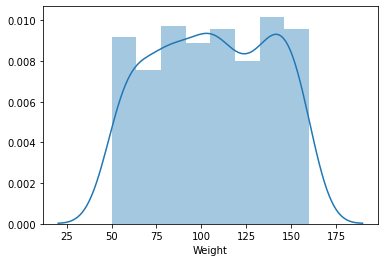

In [34]:
sns.distplot(inpt.Weight)

In [35]:
inpt.head()

,Gender,Height,Weight,Index,Index_Group
0,Male,174,96,4,Obesity
1,Male,189,87,2,Normal
2,Female,185,110,4,Obesity
3,Female,195,104,3,Overweight
4,Male,149,61,3,Overweight


## Predictions & Calculations

In [44]:
def preproccesing_data(inpt):
    inpt['Gender'] = inpt['Gender'].map({'Male':0, 'Female':1}).astype(int)
    return inpt

X= inpt[['Height', 'Weight', 'Gender']]
y= inpt[['Index']]

X_train, X_test, y_train,y_test = train_test_split (X,y,test_size=0.2)


In [46]:
X_train

,Height,Weight,Gender
9,169,103,1
345,184,106,1
106,166,160,0
278,172,75,0
24,172,67,1
...,...,...,...
111,146,157,1
282,147,94,1
463,145,141,1
198,166,144,1


In [47]:
X_test

,Height,Weight,Gender
190,141,85,0
420,195,61,1
388,157,66,1
325,148,54,1
203,182,104,0
...,...,...,...
437,184,157,0
290,156,74,0
358,180,58,1
182,162,97,0


In [48]:
y_train

,Index
9,4
345,4
106,5
278,3
24,2
...,...
111,5
282,5
463,5
198,5


In [49]:
y_test

,Index
190,5
420,1
388,3
325,2
203,4
...,...
437,5
290,4
358,1
182,4


Logistic Regression

In [52]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
Y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_train, y_train) * 100, 2)
acc_log

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


75.25

Support Vector Machine (SVC)

In [53]:
svc = SVC()
svc.fit(X_train, y_train)
Y_pred = svc.predict(X_test)
acc_svc = round(svc.score(X_train, y_train) * 100, 2)
acc_svc

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


79.5

Stochastic Gradient Descent

In [56]:
sgd = SGDClassifier()
sgd.fit(X_train, y_train)
Y_pred = sgd.predict(X_test)
acc_sgd = round(sgd.score(X_train, y_train) * 100, 2)
acc_sgd

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


60.25

In [59]:
submission = pd.DataFrame({
        "Weight": inpt["Weight"],
        "Height": inpt["Height"],
        "Index Accuracy": Y_pred
    })
submission

ValueError: array length 100 does not match index length 500